In [7]:
import seaborn as sns
from IPython.display import HTML, display
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [9]:
penguins =sns.load_dataset('penguins')
display(penguins.head())

html_code = """
<div style="text-align: center;">
    <h2>Penguin Anatomy Diagram</h2>
    <img src="pimg.webp" alt="Labeled Penguin Diagram" style="width:50%; height:auto;">
    <p style="font-style: italic;">Figure: Labeled diagram showing parts of a penguin.</p>
</div>
"""

# Display the HTML
display(HTML(html_code))

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [10]:
df = sns.load_dataset('penguins')
df = df.dropna()

# Encode target variable
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

In [11]:
# Drop rows with missing values
df = df.dropna()

Accuracy (after mapping clusters to labels): 0.92


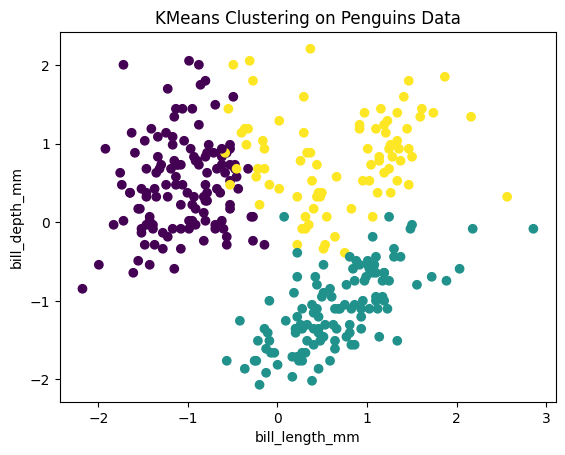

In [12]:
# Encode target variable
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# Select numeric features
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features]
y = df['species_encoded']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Map cluster labels to true labels
# Try all permutations to match labels (simple version)
from scipy.stats import mode
import numpy as np

def best_map(true_labels, cluster_labels):
    labels = np.zeros_like(cluster_labels)
    for i in range(3):  # for each cluster
        mask = (cluster_labels == i)
        labels[mask] = mode(true_labels[mask])[0]
    return labels

mapped_clusters = best_map(y.to_numpy(), clusters)

# Evaluate clustering as classification
acc = accuracy_score(y, mapped_clusters)
print(f"Accuracy (after mapping clusters to labels): {acc:.2f}")

# Optional: Plot
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title("KMeans Clustering on Penguins Data")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

**Clustering Penguins and Visualizing the Results**
After determining the optimal k value using the Elbow Method, we proceed to cluster the data using K-Means and visualize the results.

**Clustering:**

After deciding on the optimal number of clusters (e.g., k=3), we run the K-Means algorithm to group the penguins based on their features (e.g., bill length, flipper length).

The fit_predict() function assigns each data point to a cluster, and we add this cluster information to the DataFrame.

**Visualization:**

We visualize the clustering result on a 2D scatter plot, where each point represents a penguin.

The color of each point corresponds to the cluster it belongs to. This allows us to visually observe how well the clusters are formed.

**Why We Did It:**

After determining k using the elbow method, we perform the clustering to assign each penguin to a cluster.

Visualizing the clusters allows us to understand how the model grouped the data based on features. It gives a clear view of how distinct or overlapping the clusters are.



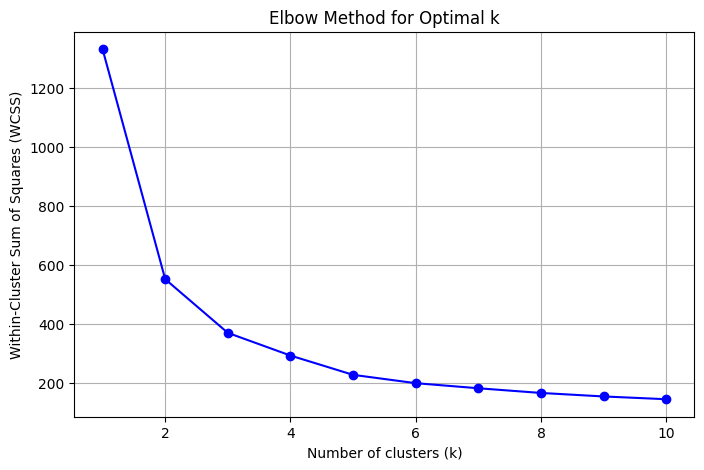

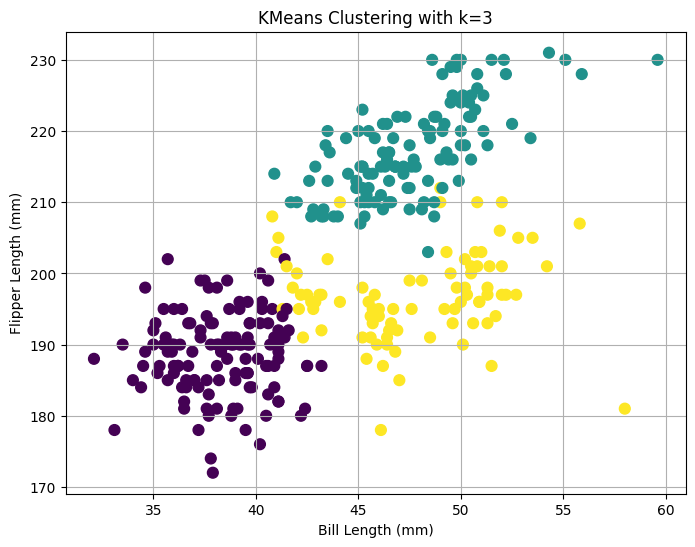

In [ ]:
# Step 3: Elbow Method to find optimal number of clusters
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Perform clustering with optimal k (e.g., 3 based on elbow)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['bill_length_mm'], df['flipper_length_mm'],
                      c=df['cluster'], cmap='viridis', s=60)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title(f'KMeans Clustering with k={optimal_k}')
plt.grid(True)
plt.show()

**Elbow Method**
The Elbow Method is a technique used to determine the optimal number of clusters (k) for K-Means clustering. Here's a step-by-step breakdown of the code for the elbow method:

**WCSS (Within-Cluster Sum of Squares):**

This measures how spread out the data points are within a cluster. Lower WCSS indicates tighter clusters.

**Elbow Curve:**

The idea is to plot the WCSS against different values of k (number of clusters).

As the number of clusters increases, the WCSS will decrease, but after a certain point, the reduction becomes less significant. This point, where the curve starts flattening, is called the "elbow point". This is typically where we can stop increasing k because additional clusters no longer improve the model significantly.

**Why We Did It:**

The Elbow Method helps choose the optimal number of clusters (k) without relying on prior knowledge. The "elbow" indicates the point where the model starts to overfit (more clusters without much improvement), guiding us to the most efficient number of clusters.


**Difference Between Both Methods**
 
 
**Purpose:**

**Elbow Method:** The goal here is to determine the optimal number of clusters (k). We plot the WCSS values for different k values and look for the "elbow" to guide us in selecting the best k.

**K-Means Clustering & Visualization:** This step uses the chosen k to perform the actual clustering. It groups the penguins based on the selected features and visualizes how these groups (clusters) look in a scatter plot.


**Focus:**

The Elbow Method focuses on finding the best number of clusters (k).

K-Means & Visualization focuses on applying the model with the chosen k and showing the results.

Output:

**Elbow Method:** Outputs a plot of WCSS vs k to visually identify the optimal number of clusters.

**K-Means Clustering & Visualization:** Outputs cluster assignments for each penguin and a scatter plot showing how the clusters are formed based on selected features.

**Why We Did It?**


**Elbow Method:** Helps us decide the number of clusters to use in our K-Means model. Without this step, we might choose an arbitrary number of clusters, which could lead to a poor model. The elbow method provides a data-driven approach to selecting k.

**K-Means & Visualization:** Once we know the optimal k, we run K-Means to actually cluster the data. This step provides the final model and visualization of how our clusters look, giving us insights into how well the data points (penguins in this case) are grouped together.

